In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [4]:
df_2015.columns = ['Country','Region','Happiness Rank','Happiness Score','STD','GDP','Family','Health','Freedom','Corruption','Generosity','Dystopia']

In [5]:
df_2015 = df_2015.drop(['STD','Dystopia'],axis=1)

In [6]:
df_2016.columns = ['Country','Region','Happiness Rank','Happiness Score','STD1','STD2','GDP','Family','Health','Freedom','Corruption','Generosity','Dystopia']

In [7]:
df_2016 = df_2016.drop(['STD1','STD2','Dystopia'],axis=1)

In [8]:
df_2017.columns = ['Country','Happiness Rank','Happiness Score','STD1','STD2','GDP','Family','Health','Freedom','Generosity','Corruption','Dystopia']

In [9]:
df_2017 = df_2017.drop(['STD1','STD2','Dystopia'],axis=1)

In [10]:
df_2017 = df_2017.merge(df_2016[['Country','Region']],on='Country',how='left')

In [11]:
df_2018.columns = ['Happiness Rank','Country','Happiness Score','GDP','Family','Health','Freedom','Generosity','Corruption']

In [12]:
df_2018 = df_2018.merge(df_2016[['Country','Region']],on='Country',how='left')

In [13]:
df_2019.columns = ['Happiness Rank','Country','Happiness Score','GDP','Family','Health','Freedom','Generosity','Corruption']

In [14]:
df_2019 = df_2019.merge(df_2016[['Country','Region']],on='Country',how='left')

In [15]:
df = pd.concat([df_2015,df_2016,df_2017,df_2018,df_2019])

In [16]:
df = df.dropna()

In [17]:
df = df.groupby(['Country','Region']).mean()

In [18]:
df = df.reset_index()

In [19]:
df = df.drop(['Country', 'Happiness Rank'],axis=1)

In [20]:
df

,Region,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity
0,Southern Asia,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
1,Central and Eastern Europe,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
2,Middle East and Northern Africa,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
3,Sub-Saharan Africa,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269
4,Latin America and Caribbean,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
...,...,...,...,...,...,...,...,...
159,Latin America and Caribbean,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
160,Southeastern Asia,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
161,Middle East and Northern Africa,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
162,Sub-Saharan Africa,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           164 non-null    object 
 1   Happiness Score  164 non-null    float64
 2   GDP              164 non-null    float64
 3   Family           164 non-null    float64
 4   Health           164 non-null    float64
 5   Freedom          164 non-null    float64
 6   Corruption       164 non-null    float64
 7   Generosity       164 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.4+ KB


In [22]:
df.describe()

,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,5.384550,0.903308,1.067247,0.602577,0.412297,0.129764,0.221430
std,1.099245,0.409405,0.279457,0.242303,0.145737,0.104723,0.116573
min,3.079000,0.005661,0.000000,0.049513,0.027433,0.001654,0.000000
25%,4.442850,0.570993,0.934900,0.416294,0.317728,0.060231,0.138687
50%,5.317000,0.972478,1.101318,0.663678,0.432305,0.097550,0.208368
75%,6.153450,1.234365,1.305038,0.773564,0.512431,0.156909,0.280948
max,7.546000,1.743691,1.492813,1.029513,0.655988,0.473468,0.723533


In [23]:
df.isna().sum()

Region             0
Happiness Score    0
GDP                0
Family             0
Health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

In [24]:
df.isnull().sum()

Region             0
Happiness Score    0
GDP                0
Family             0
Health             0
Freedom            0
Corruption         0
Generosity         0
dtype: int64

In [26]:
def status(x):
    if(x<5):
        return "Infeliz"
    else:
        return "Feliz"

In [27]:
df['Status'] = df['Happiness Score'].apply(status)
df

,Region,Happiness Score,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,Infeliz
1,Central and Eastern Europe,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,Infeliz
2,Middle East and Northern Africa,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,Feliz
3,Sub-Saharan Africa,3.87225,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,Infeliz
4,Latin America and Caribbean,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,Feliz
...,...,...,...,...,...,...,...,...,...
159,Latin America and Caribbean,5.53140,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,Feliz
160,Southeastern Asia,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,Feliz
161,Middle East and Northern Africa,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,Infeliz
162,Sub-Saharan Africa,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430,Infeliz


In [28]:
df = df.drop('Happiness Score',axis=1)

In [29]:
df.head(1)

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,0.357113,0.409753,0.254707,0.117924,0.058094,0.26773,Infeliz


### Colunas em texto serão convertidas de variáveis categóricas para numéricas

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
enconder = LabelEncoder()

In [33]:
df['Status'] = enconder.fit_transform(df['Status'])

In [34]:
enconder.classes_

array(['Feliz', 'Infeliz'], dtype=object)

In [35]:
df.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,1
1,Central and Eastern Europe,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,1
2,Middle East and Northern Africa,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,0
3,Sub-Saharan Africa,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,1
4,Latin America and Caribbean,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,0


In [36]:
colunas = ['GDP', 'Family', 'Freedom', 'Corruption', 'Generosity']

In [37]:
colunas

['GDP', 'Family', 'Freedom', 'Corruption', 'Generosity']

### Normalização de dados

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc=StandardScaler()

In [41]:
for col in colunas:
    df[col] = sc.fit_transform(df[col].values.reshape(-1,1))

In [42]:
df.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,-1.338202,-2.359964,0.254707,-2.026085,-0.686475,0.398393,1
1,Central and Eastern Europe,0.086547,-1.121005,0.787696,-0.278056,-0.829122,-0.460718,1
2,Middle East and Northern Africa,0.268660,0.024977,0.665057,-1.609590,0.156468,-1.309708,0
3,Sub-Saharan Africa,-0.257079,-0.462589,0.133902,-2.648912,-0.557393,-0.999515,1
4,Latin America and Caribbean,0.508942,0.946554,0.760895,0.477130,-0.626952,-1.110494,0


# Analisando cada um dos critérios de felicidade


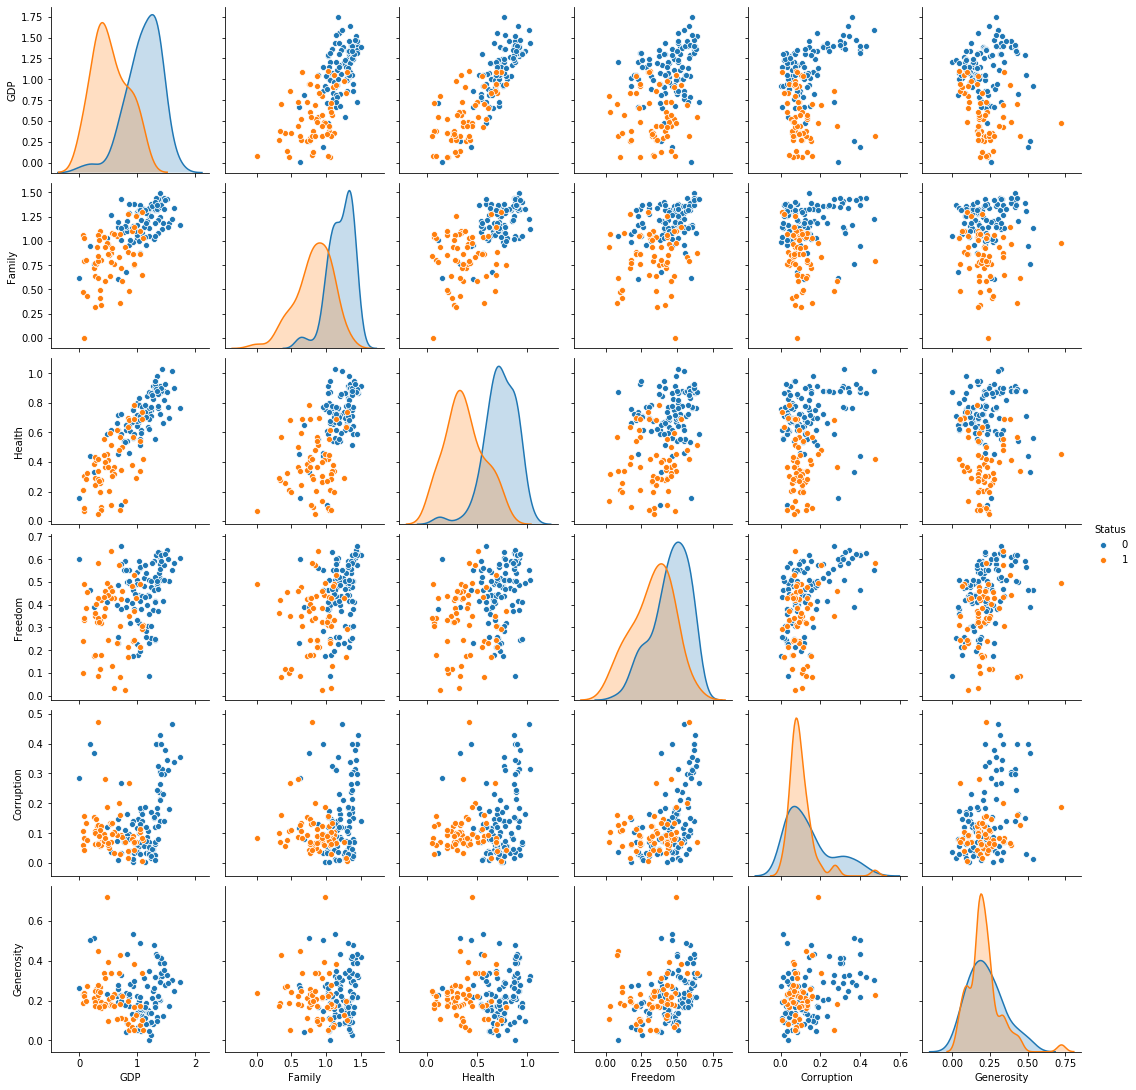

In [38]:
sns.pairplot(df, hue='Status')

Os fatores "Health" e "GDP" são os que melhor separam as classes "Infeliz" e "Feliz".

### Correlação

In [39]:
correlacao = df.corr()

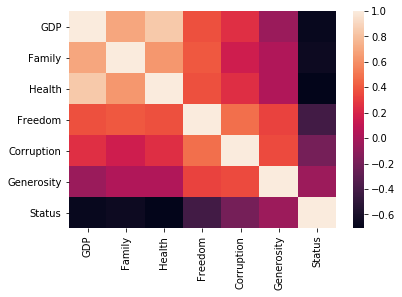

In [40]:
sns.heatmap(correlacao)

GDP & Health demonstram alguma correlação. Ou seja, podemos considerar que quanto maior o produto interno bruto de uma região,
maior será a satisfação com relação à saúde de seus habitantes.

### Proporção de regiões Infelizes x Felizes

In [41]:
df['Status'].value_counts()

0    104
1     60
Name: Status, dtype: int64

In [42]:
classes = df['Status'].unique()
n_classes = len(classes)

### Distribuição de dados cadastrados por região.

In [43]:
df['Region'].value_counts()

Sub-Saharan Africa                 44
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

### Analisando a pontuação de felicidade por região.

Observamos que de forma massiva, os paízes com menor pontuação se encontram na região Sub-Saharan Africa. Enquanto 4 regiões se destacaram por não possuírem registros de países infelizes:
Sub-Saharan Africa, Western Europe, Eastern Asia, Australia and New Zealand e North America.         

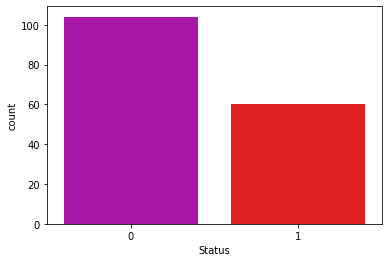

In [44]:
sns.countplot(x='Status', palette=["m", "r"],data=df)

### "Felizes" = 0                "Infelizes" = 1

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

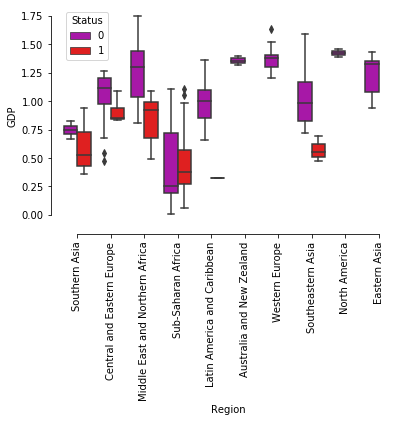

In [45]:
sns.boxplot(x="Region", y="GDP", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

Também observa-se que quanto maior o GDP, menor o índice de infelicidade entre as regiões.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

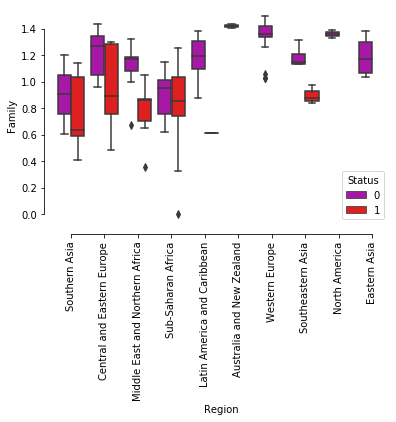

In [46]:
sns.boxplot(x="Region", y="Family", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)


Neste gráfico, nota-se que Ainda que as regiões com alto índice de infelicidade ainda podem considerar-se satisfeitos com o critério "Família"

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

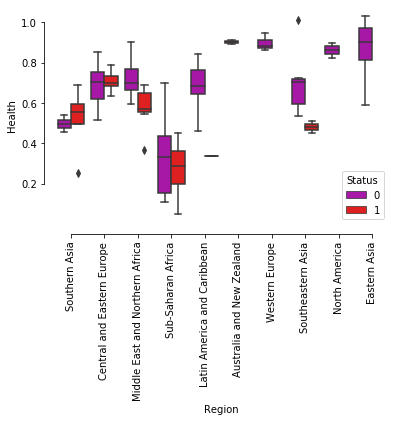

In [47]:
sns.boxplot(x="Region", y="Health", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A saúde mostra-se um fator importante na definição das categorias. Quanto menor a satisfação com a saúde, menor é o índice de felicidade.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

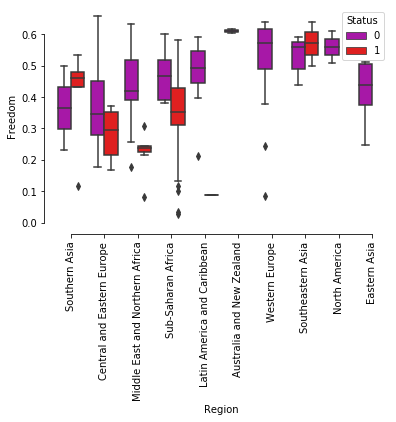

In [48]:
sns.boxplot(x="Region", y="Freedom", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A liberdade não demonstra-se um fator relevante para determinar-se se uma região é ou não feliz. Pois países infelizes indicam ter maior satisfação com relação ao critério "Liberdade".

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

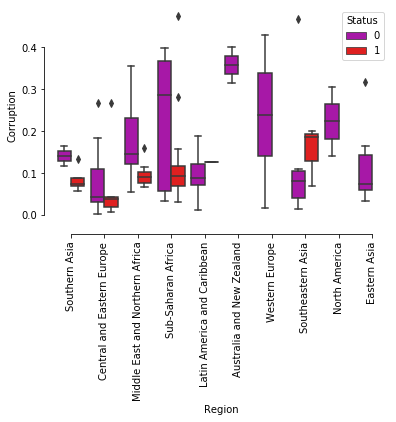

In [49]:
sns.boxplot(x="Region", y="Corruption", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

Da mesma forma quando analisamos os mais infelizes, identificamos que existem uma grande quandidade de regiões infelizes com pouca corrupção.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

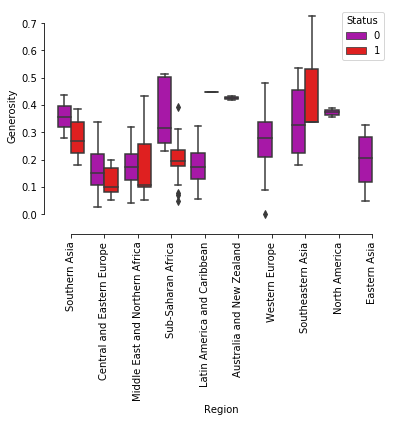

In [50]:
sns.boxplot(x="Region", y="Generosity", hue="Status", palette=["m", "r"], data=df)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)

A generosidade também mostra-se pouco relevante para a definição das categorias, Feliz ou Infeliz

### Uma rápida representação do posicionamento geográfico da região menos feliz.

<img src="https://www.eoi.es/blogs/lauraambros/files/2012/01/Map_-_Africa_LRG.jpg" alt="HTML tutorial" width="600" height="600" />

"https://www.eoi.es/blogs/lauraambros/files/2012/01/Map_-_Africa_LRG.jpg"

Obs.: É importante ressaltar que a grande quantidade de dados em regiões infelizes, faz com que a média de nossos dados seja puxada para baixo. Portando, entendo que os dados estão desbalanceados, se contrastados com regiões com poucos registros de dados na pesquisa.

In [51]:
df.head()

,Region,GDP,Family,Health,Freedom,Corruption,Generosity,Status
0,Southern Asia,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,1
1,Central and Eastern Europe,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,1
2,Middle East and Northern Africa,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,0
3,Sub-Saharan Africa,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,1
4,Latin America and Caribbean,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,0


In [52]:
dummies = pd.get_dummies(df.Region)

In [53]:
df = pd.concat([df,dummies], axis='columns')

### Separando variáveis X e Y

In [54]:
df=df.drop('Region', axis=1)

In [55]:
X = df.drop(['Status'], axis=1).values
Y = df['Status'].values

In [56]:
X

array([[0.35711344, 0.40975267, 0.25470736, ..., 1.        , 0.        ,
        0.        ],
       [0.93863255, 0.75493105, 0.78769595, ..., 0.        , 0.        ,
        0.        ],
       [1.01296289, 1.07420549, 0.66505693, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.48931269, 0.86544845, 0.36544018, ..., 0.        , 0.        ,
        0.        ],
       [0.57176136, 0.93238146, 0.30276118, ..., 0.        , 1.        ,
        0.        ],
       [0.34405131, 1.00772718, 0.27440275, ..., 0.        , 1.        ,
        0.        ]])

In [57]:
Y

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

### Separando em amostras de treino e teste

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_treino,X_teste,Y_treino,Y_teste=train_test_split(X,Y,test_size=0.25,random_state=42)

### RandomForest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
modelo = RandomForestClassifier()

In [62]:
modelo.fit(X_treino,Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Determinando acurácia na amostra de treino

In [63]:
score_treino = modelo.score(X_treino,Y_treino)

In [64]:
score_treino


1.0

### Prevendo amostras de teste

In [65]:
Y_previsto = modelo.predict(X_teste)

In [66]:
score_teste = modelo.score(X_teste,Y_teste)


In [67]:
score_teste


0.926829268292683

### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm=confusion_matrix(Y_teste,Y_previsto)


In [70]:
cm


array([[22,  2],
       [ 1, 16]], dtype=int64)

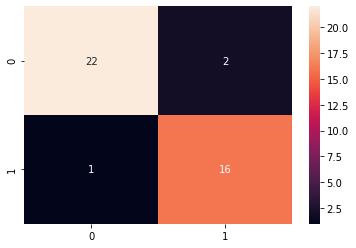

In [71]:
sns.heatmap(cm,annot=True, fmt="d")

Neste caso, observa-se que o modelo mostrou um desempenho muito bom quando comparado com seus erros

In [72]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [73]:
cr = classification_report(Y_teste,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        24
           1       0.89      0.94      0.91        17

    accuracy                           0.93        41
   macro avg       0.92      0.93      0.93        41
weighted avg       0.93      0.93      0.93        41



### F1-score

In [74]:
f1 = f1_score(Y_teste,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

F1 score = 91.43%


### Precision Score

In [75]:
precisao = precision_score(Y_teste,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 88.89%


### Average precision score

In [76]:
avg_precision = average_precision_score (Y_teste,Y_previsto)
print("Averaged Precision Score = {:0.2f}%".format(avg_precision*100))

Averaged Precision Score = 86.10%


### Recall score

In [77]:
rec = recall_score (Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 94.12%


### Accuracy Score

In [78]:
acc = accuracy_score (Y_teste,Y_previsto)
print("Recall score = {:0.2f}%".format(acc*100))

Recall score = 92.68%


O modelo atual apresentou uma boa precisão indicando que o seu uso pode ser adequado dada ao baixo nível
de criticidade desta análise.  

## **Curva ROC**


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

In [80]:
roc_score = roc_auc_score(Y_teste, Y_previsto)
print("ROC score = {:.2f}%".format(roc_score*100))

ROC score = 92.89%


In [81]:
roc_fpr, roc_tpr, _ = roc_curve(Y_teste, Y_previsto)

Text(0, 0.5, 'True Positive Rate')

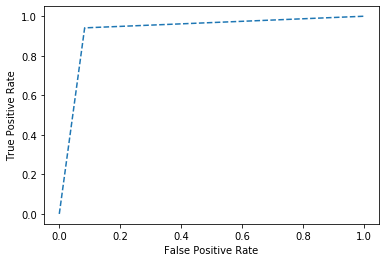

In [82]:
plt.plot(roc_fpr, roc_tpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### **Curva Precision-Recall**

In [83]:
from sklearn.metrics import precision_recall_curve,auc

In [84]:
lr_precision, lr_recall, _ = precision_recall_curve(Y_teste, Y_previsto)
lr_auc = auc(lr_recall, lr_precision)

In [85]:
print("AUC score = {:0.2f}%".format(lr_auc*100))

AUC score = 92.72%


Text(0, 0.5, 'Precision')

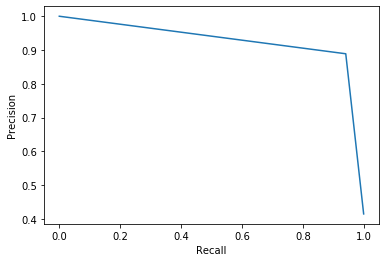

In [86]:
plt.plot(lr_recall, lr_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')